In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
link = 'https://assets.datacamp.com/production/repositories/1764/datasets/79c5446a4a753e728e32b4a67138344847b8f131/Churn.csv'
df = pd.read_csv(link)

In [46]:
df = pd.read_csv('Churnchp4.csv')
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Total_Minutes,Total_Charge,Min_Call,Total_Calls,Cost_Call,Region_Code
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,91,11.01,3,2.70,717.2,75.56,2.37,303,4.01,3
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,103,11.45,3,3.70,625.2,59.24,1.88,332,5.60,3
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,104,7.32,5,3.29,539.4,62.29,1.62,333,5.35,4
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,89,8.86,7,1.78,564.8,66.80,2.21,255,3.82,3
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,121,8.41,3,2.73,512.0,52.09,1.43,359,6.89,6


In [47]:
df.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'Total_Minutes',
       'Total_Charge', 'Min_Call', 'Total_Calls', 'Cost_Call', 'Region_Code'],
      dtype='object')

In [3]:
dict_bin = {'no': 0 , 'yes': 1}
df['Vmail_Plan'] = df['Vmail_Plan'].replace(dict_bin)
df['Churn'] = df['Churn'].replace(dict_bin)
df['Intl_Plan'] = df['Intl_Plan'].replace(dict_bin)

In [4]:
df_state = pd.get_dummies(df['State'])

In [5]:
df = df.drop(['State', 'Area_Code', 'Phone','Day_Mins','Eve_Mins','Night_Mins','Intl_Mins'], axis=1)

In [6]:
df = pd.concat([df, df_state], axis=1)

In [48]:
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Total_Minutes,Total_Charge,Min_Call,Total_Calls,Cost_Call,Region_Code
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,91,11.01,3,2.70,717.2,75.56,2.37,303,4.01,3
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,103,11.45,3,3.70,625.2,59.24,1.88,332,5.60,3
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,104,7.32,5,3.29,539.4,62.29,1.62,333,5.35,4
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,89,8.86,7,1.78,564.8,66.80,2.21,255,3.82,3
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,121,8.41,3,2.73,512.0,52.09,1.43,359,6.89,6


In [8]:
scaled_features = df.copy()
vars_to_scale = ['Account_Length','Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge','Vmail_Message','CustServ_Calls', 'Day_Calls', 'Eve_Calls', 'Night_Calls', 'Intl_Calls'] #, 'Total_Mins','Total_Charge','Day_Cost','Eve_Cost','Night_Cost','Intl_Cost','Total_Cost']

In [45]:
#https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set
from sklearn.preprocessing import StandardScaler
features = scaled_features[vars_to_scale]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[vars_to_scale] = features
scaled_features.head()

,Account_Length,Vmail_Message,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0.676489,1.234883,-0.427932,0,0,1,0.476643,1.567036,-0.055940,-0.070427,...,0,0,0,0,0,0,0,0,0,0
1,0.149065,1.307948,-0.427932,0,0,1,1.124503,-0.334013,0.144867,-0.107549,...,0,0,0,0,0,0,0,0,0,0
2,0.902529,-0.591760,-1.188218,0,0,0,0.675985,1.168464,0.496279,-1.573900,...,0,0,0,0,0,0,0,0,0,0
3,-0.428590,-0.591760,0.332354,0,1,0,-1.466936,2.196759,-0.608159,-2.743268,...,0,0,0,0,0,0,0,0,0,0
4,-0.654629,-0.591760,1.092641,0,1,0,0.626149,-0.240041,1.098699,-1.037939,...,0,0,0,0,0,0,0,0,0,0


In [10]:
scaled_features.isnull().values.sum()

0

In [49]:
X = scaled_features.drop('Churn', axis=1)
y = scaled_features[['Churn']]

In [52]:
scaler = StandardScaler().fit(X.values)
X = scaler.transform(X)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# instantiate SelectKBest to determine 20 best features
best_features = SelectKBest(score_func=f_classif, k=20)
fit = best_features.fit(X_train,y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(20,'Score'))  # print 20 best features

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#allows printing of all data in cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [56]:
#evaluation - baselines
num_folds = 10
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f %f " % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR 0.857252 0.017264 
LDA 0.852533 0.025048 
KNN 0.854272 0.019977 
CART 0.902707 0.021841 
SVM 0.858987 0.019266 


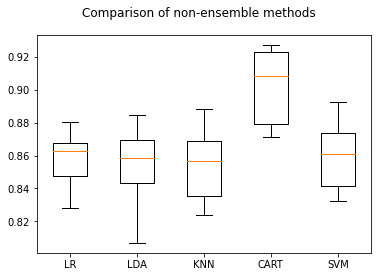

In [57]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Comparison of non-ensemble methods')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

AB: 0.873126 (0.023143)
GBM: 0.946418 (0.016092)
RF: 0.926281 (0.019227)
ET: 0.901423 (0.019882)


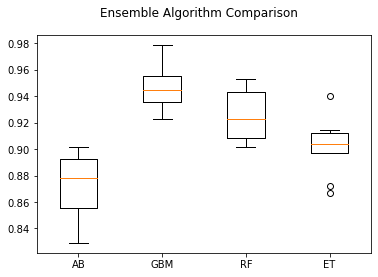

In [58]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

### RF tuning

In [17]:
param_grid = { 
    'n_estimators': [200, 250, 300, 350],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,10],
    'criterion' :['gini', 'entropy'],
    'min_samples_split': [2, 4, 6, 8]
}
rfc=RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
CV_rfc.best_params_
rfc1 = RandomForestClassifier(max_features='sqrt', n_estimators= 300, max_depth=10, criterion='gini', min_samples_split= 4)
rfc1.fit(X_train, y_train)
pred = rfc1.predict(X_test)

# DT tuning

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
depths = np.arange(1, 21)
params = {'max_depth': list(range(1,21,2)), 'max_leaf_nodes': list(range(2, 20, 2)), 'min_samples_split': [2, 3, 4, 5]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=5)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:   18.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
   

In [47]:
grid_search_cv.best_params_
dtc1 = DecisionTreeClassifier(max_depth=7, max_leaf_nodes= 18, min_samples_split=4)
dtc1.fit(X_train, y_train)
pred = rfc1.predict(X_test)

{'max_depth': 7, 'max_leaf_nodes': 18, 'min_samples_split': 4}

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=18,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Gradient Boosting tuning

In [51]:
parameters = {
    #"loss":["deviance"],
    #"learning_rate": [0.01, 0.05, 0.1, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8,10],
    "max_features":["log2","sqrt"],
    #"criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5,0.8,0.9,1.0],
    "n_estimators":[5,10,15,20]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)

KeyboardInterrupt: 

<Figure size 2400x1600 with 0 Axes>

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=18, min_samples_split=4)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=4,
                       n_estimators=300)

GradientBoostingClassifier()

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=7,
                                                     max_leaf_nodes=18,
                                                     min_samples_split=4)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_split=4,
                                                     n_estimators=300)),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft', weights=[1, 2, 2])

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, '1-Specificity(False Positive Rate)')

Text(0, 0.5, 'Sensitivity(True Positive Rate)')

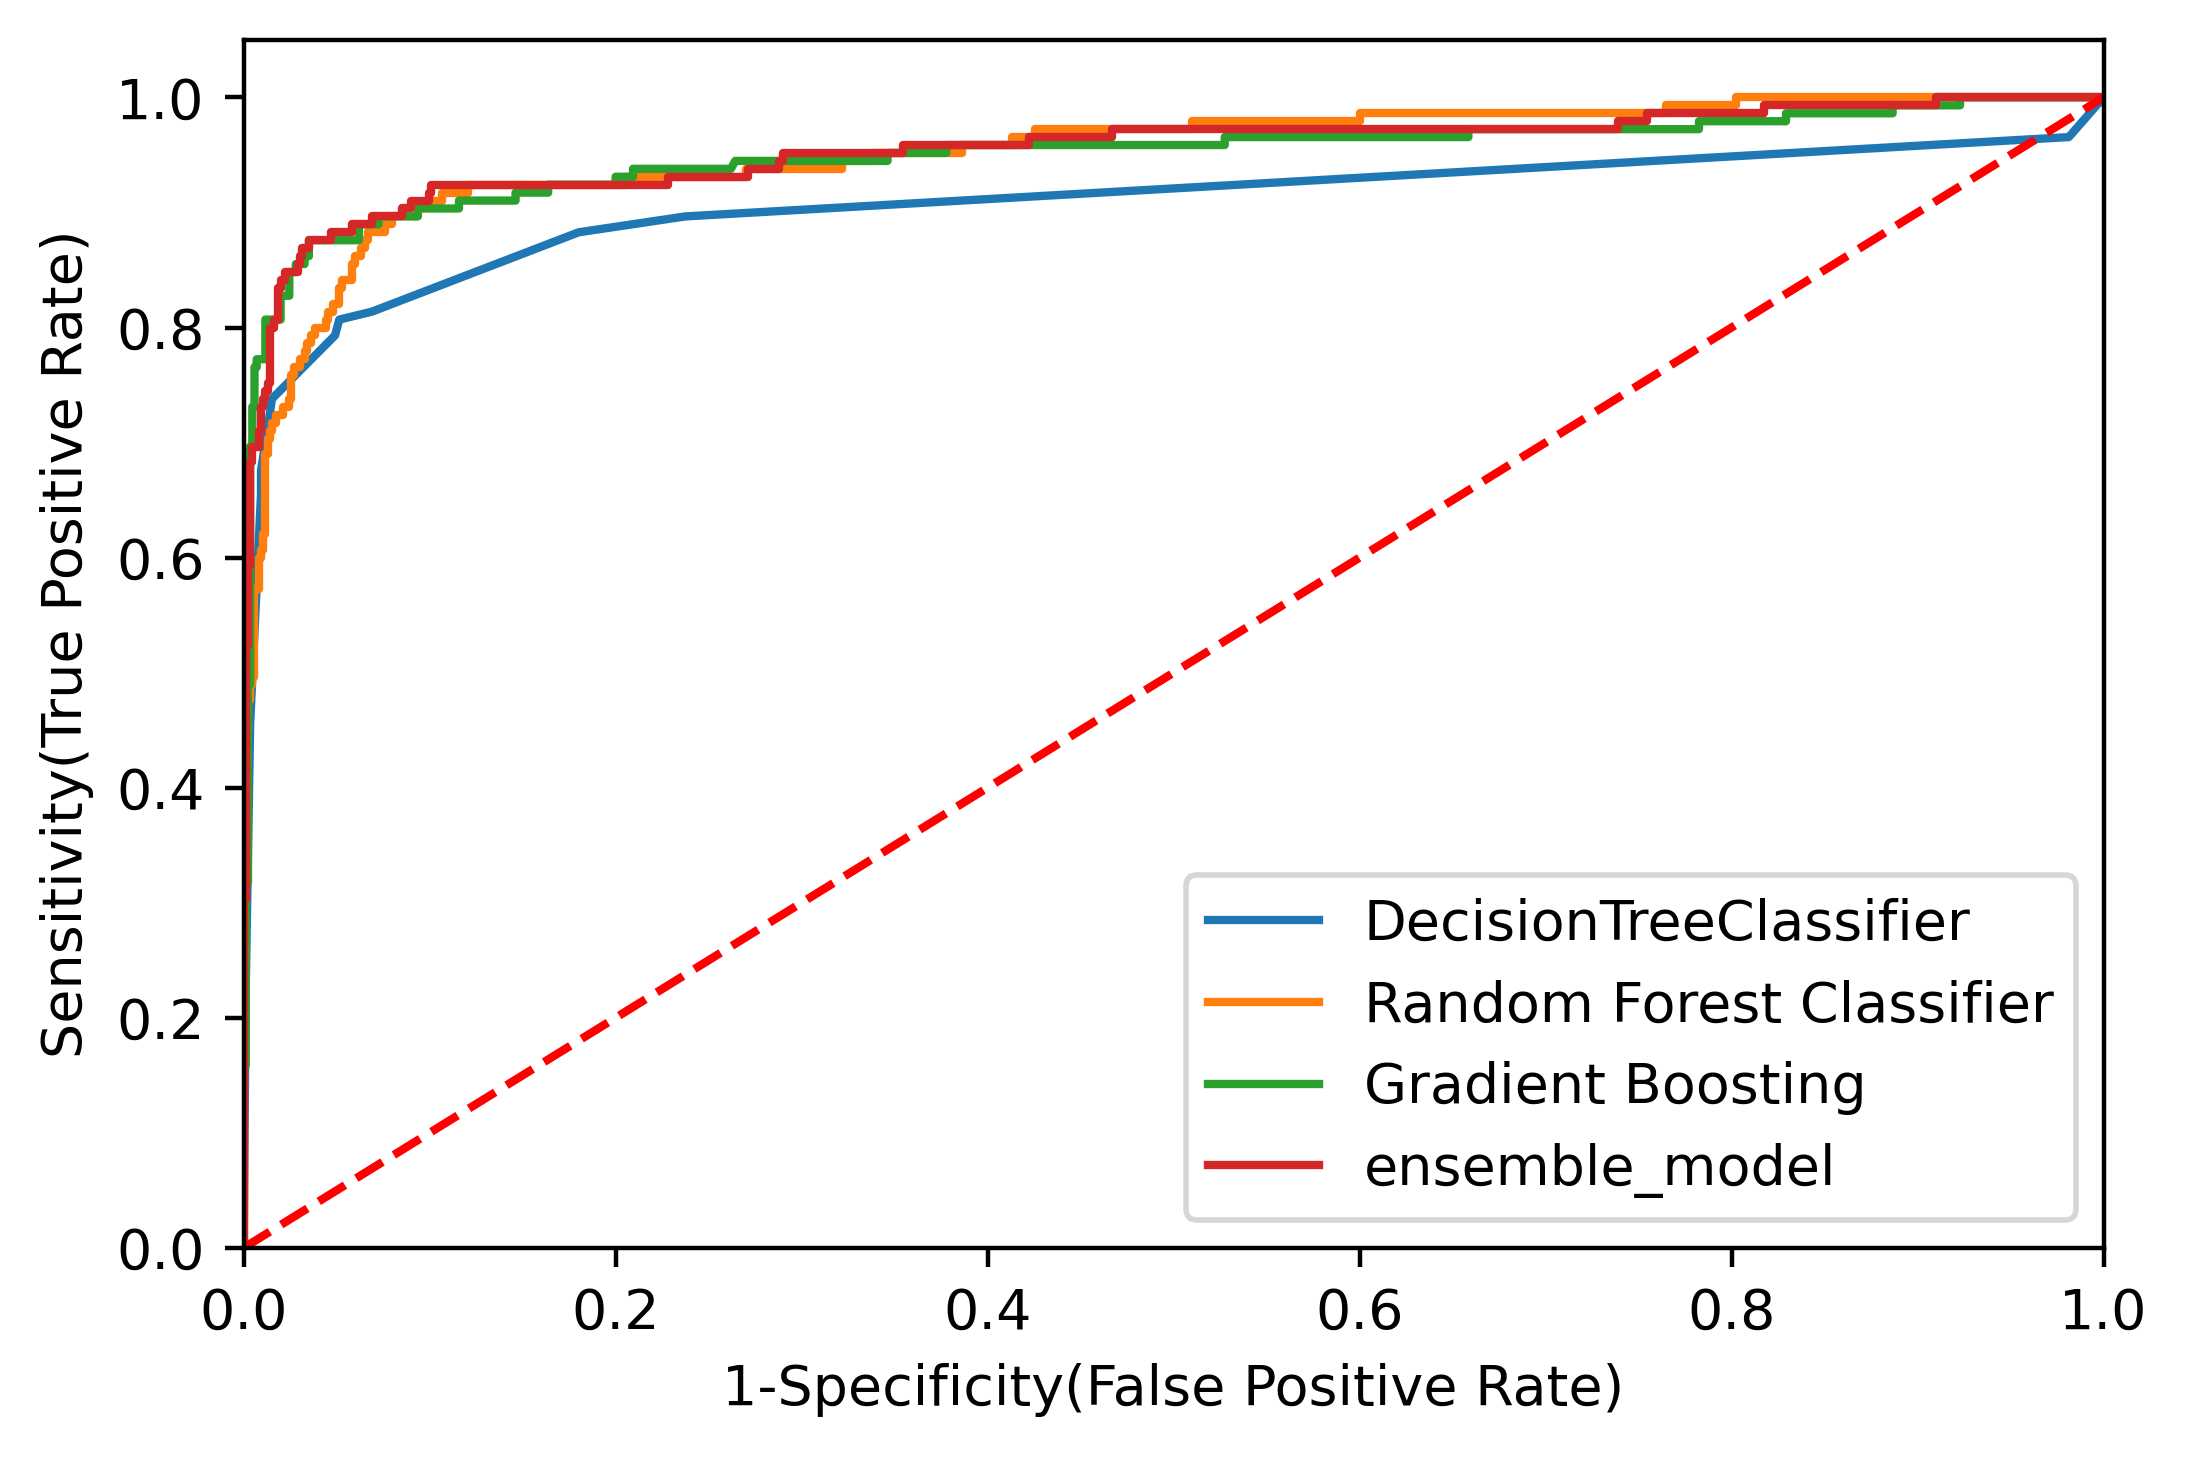

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400

plt.figure()

models = {'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=7, max_leaf_nodes= 18, min_samples_split=4),
#         'Gradient Boosting' : GradientBoostingClassifier(loss= , learning_rate= , min_samples_split= , 
#                                                 min_samples_leaf= , max_depth= , max_features= , 
#                                                         criterion= , subsample= , n_estimators= ,),
          'Random Forest Classifier': RandomForestClassifier(max_features='sqrt', n_estimators= 300, 
                                            max_depth=10, criterion='gini', min_samples_split= 4),
          'Gradient Boosting' : GradientBoostingClassifier(),
          'ensemble_model' : VotingClassifier(estimators=[('dt', clf1), ('rf', clf2), ('gb', clf3)], voting='soft', weights=[1,2,2])
          
          
}
# Below for loop iterates through your models list
labels = list()
for l, m in models.items():
    model = m # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (l, auc))
    labels.append(l)
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(labels)
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')

In [22]:
from sklearn.ensemble import VotingClassifier
clf1 = DecisionTreeClassifier(max_depth=7, max_leaf_nodes= 18, min_samples_split=4)
clf2 = RandomForestClassifier(max_features='sqrt', n_estimators= 300, 
                                            max_depth=10, criterion='gini', min_samples_split= 4)
clf3 = GradientBoostingClassifier()

In [23]:
ensemble_model = VotingClassifier(estimators=[('dt', clf1), ('rf', clf2), ('gb', clf3)], voting='hard')

In [24]:
ensemble_model.fit(X_train, y_train)
ensemble_model.predict(X_test)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=7,
                                                     max_leaf_nodes=18,
                                                     min_samples_split=4)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_split=4,
                                                     n_estimators=300)),
                             ('gb', GradientBoostingClassifier())])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,